In [5]:
from skimage.io import imread
from wordcloud import WordCloud
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import random
import seaborn as sns
import itertools

#settings
color = sns.color_palette()
sns.set_style("dark")

## Define params and helpers

In [11]:
data_dir = 'ODIR_dataset'
train_img_dir = 'ODIR-5K_Training_Dataset'
test_img_dir = 'ODIR-5K_Training_Dataset'
annotations = 'ODIR-5K_Training_Annotations(Updated)_V2.xlsx'

## Load xlsx annotations

In [12]:
df_path = os.path.join(data_dir, annotations)
df = pd.read_excel(df_path)
df[:10]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


Unique age count:  [1, 14, 15, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91]
Min age 1
Min age 91


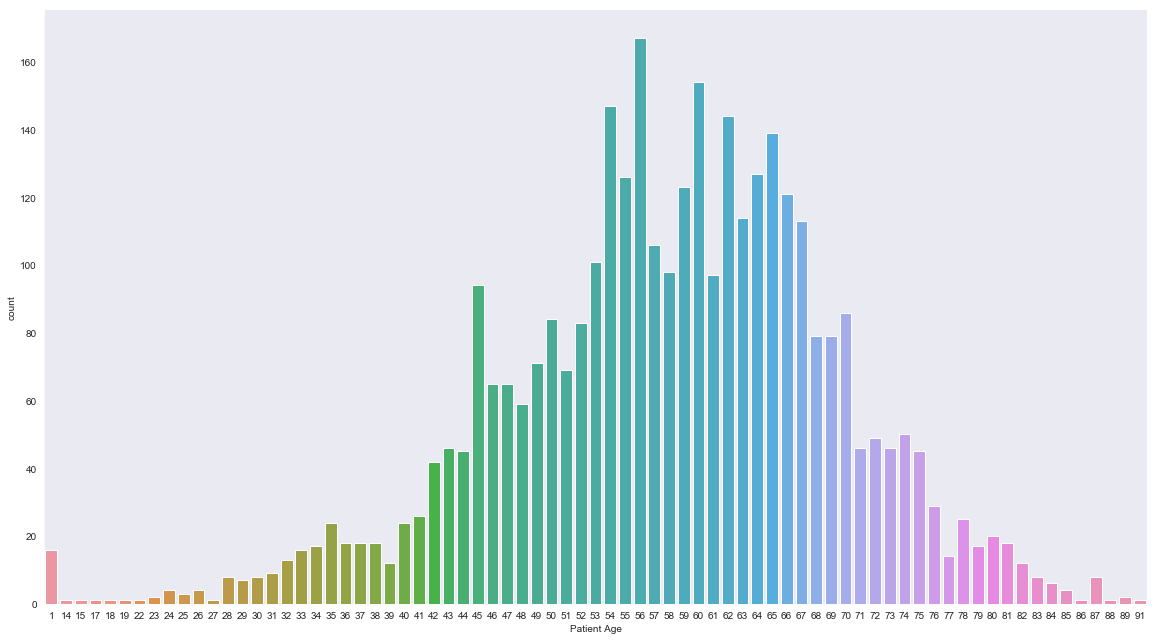

In [13]:
# Explore Age
print('Unique age count: ', sorted(df['Patient Age'].unique()))
print('Min age', min(df['Patient Age'].values))
print('Min age', max(df['Patient Age'].values))

# Plot
sns.catplot(x="Patient Age", kind="count", data=df, height=9, aspect=16/9)

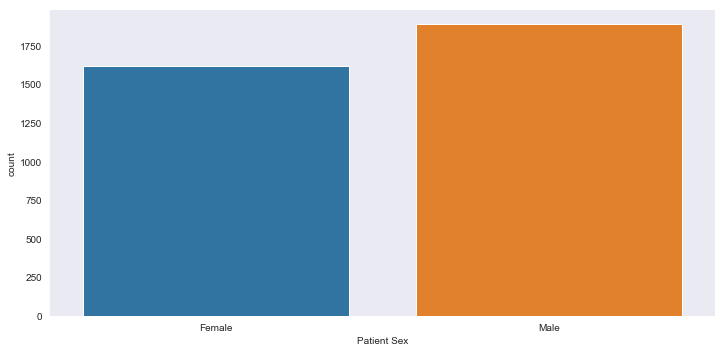

In [14]:
# Explore Gender
sns.catplot(x="Patient Sex", kind="count", data=df, height=5, aspect=10/5)

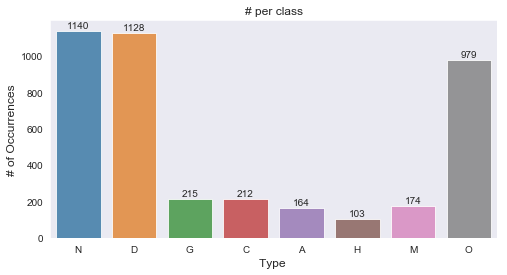

In [15]:
# Plot classes
x=df.iloc[:,7:].sum()

# Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [16]:
x=df.iloc[:,6:].sum()
#marking comments without any tags as "clean"

rowsums=df.iloc[:,6:].sum(axis=1)

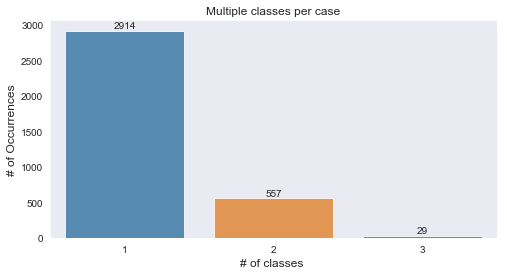

In [17]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple classes per case")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of classes ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

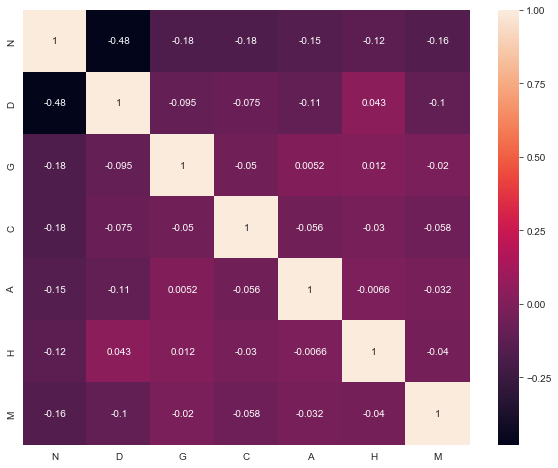

In [18]:
temp_df=df.iloc[:,6:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [19]:
left_diagnostic_keywords = list(itertools.chain(*[k.split('，') for k in df['Left-Diagnostic Keywords'].values]))
right_diagnostic_keywords = list(itertools.chain(*[k.split('，') for k in df['Right-Diagnostic Keywords'].values]))

values_left, counts_left = np.unique(left_diagnostic_keywords, return_counts=True)
values_right, counts_right = np.unique(right_diagnostic_keywords, return_counts=True)

In [20]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

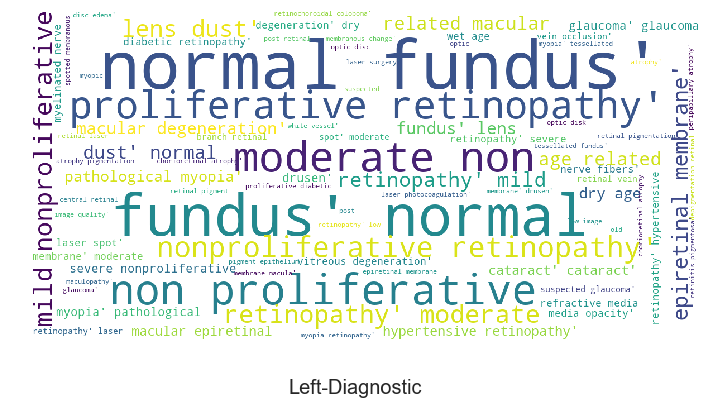

In [21]:
show_wordcloud(left_diagnostic_keywords, 'Left-Diagnostic')

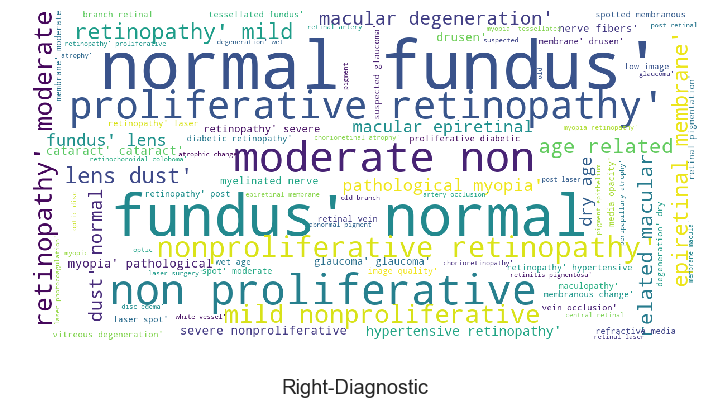

In [22]:
show_wordcloud(right_diagnostic_keywords, 'Right-Diagnostic')

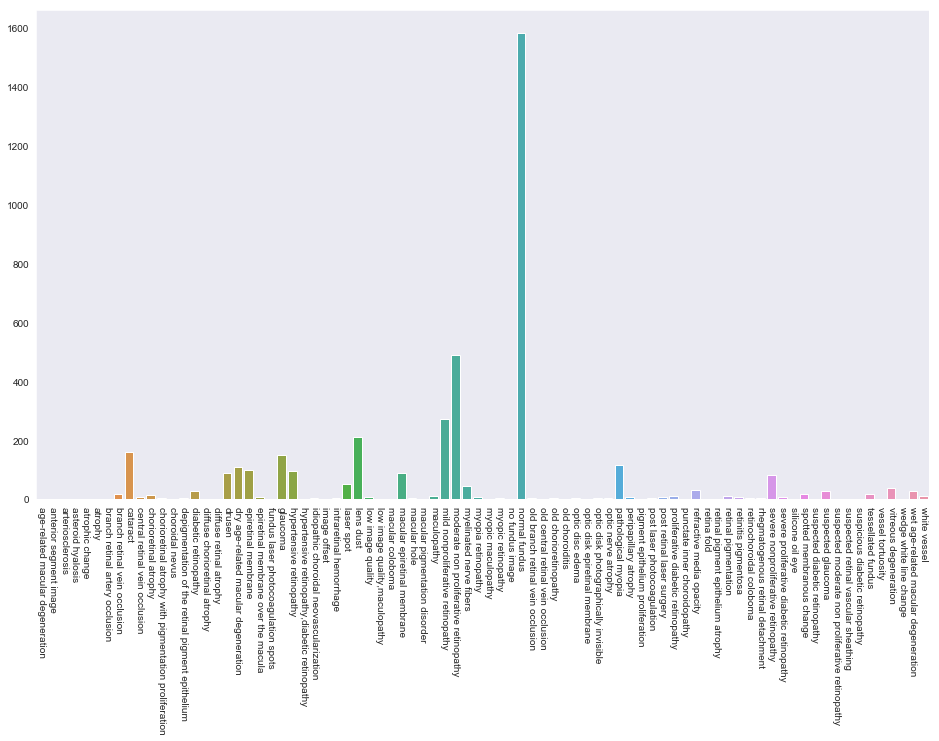

In [23]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.xticks(rotation=270)
sns.barplot(ax=ax, x=list(values_left), y=list(counts_left))

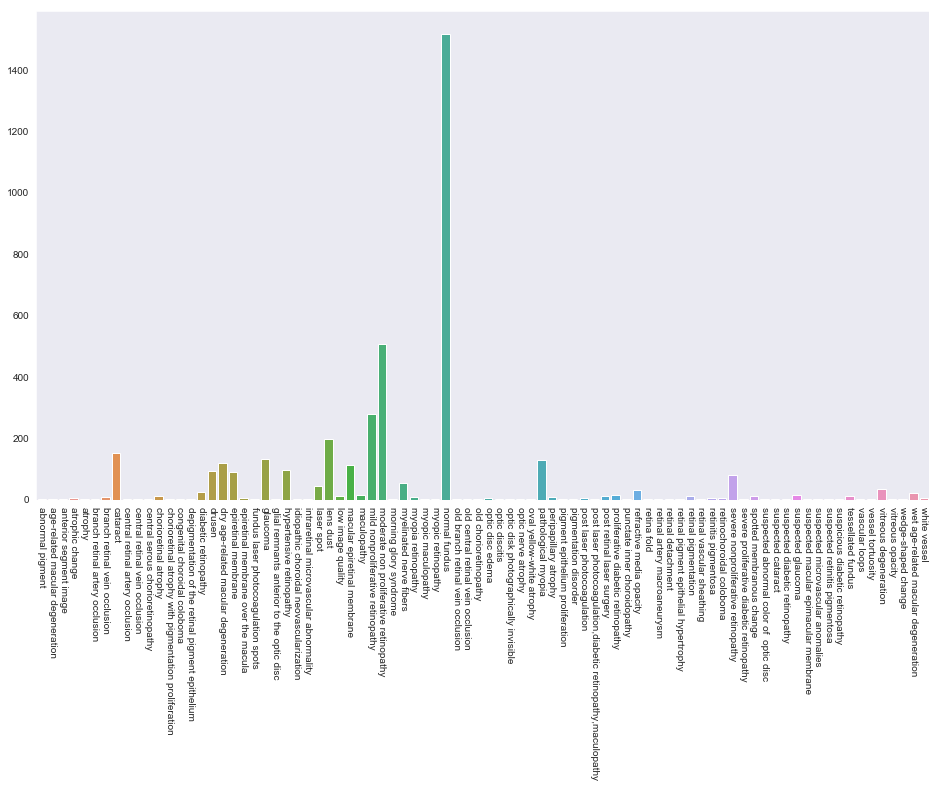

In [24]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.xticks(rotation=270)
sns.barplot(ax=ax, x=list(values_right), y=list(counts_right))

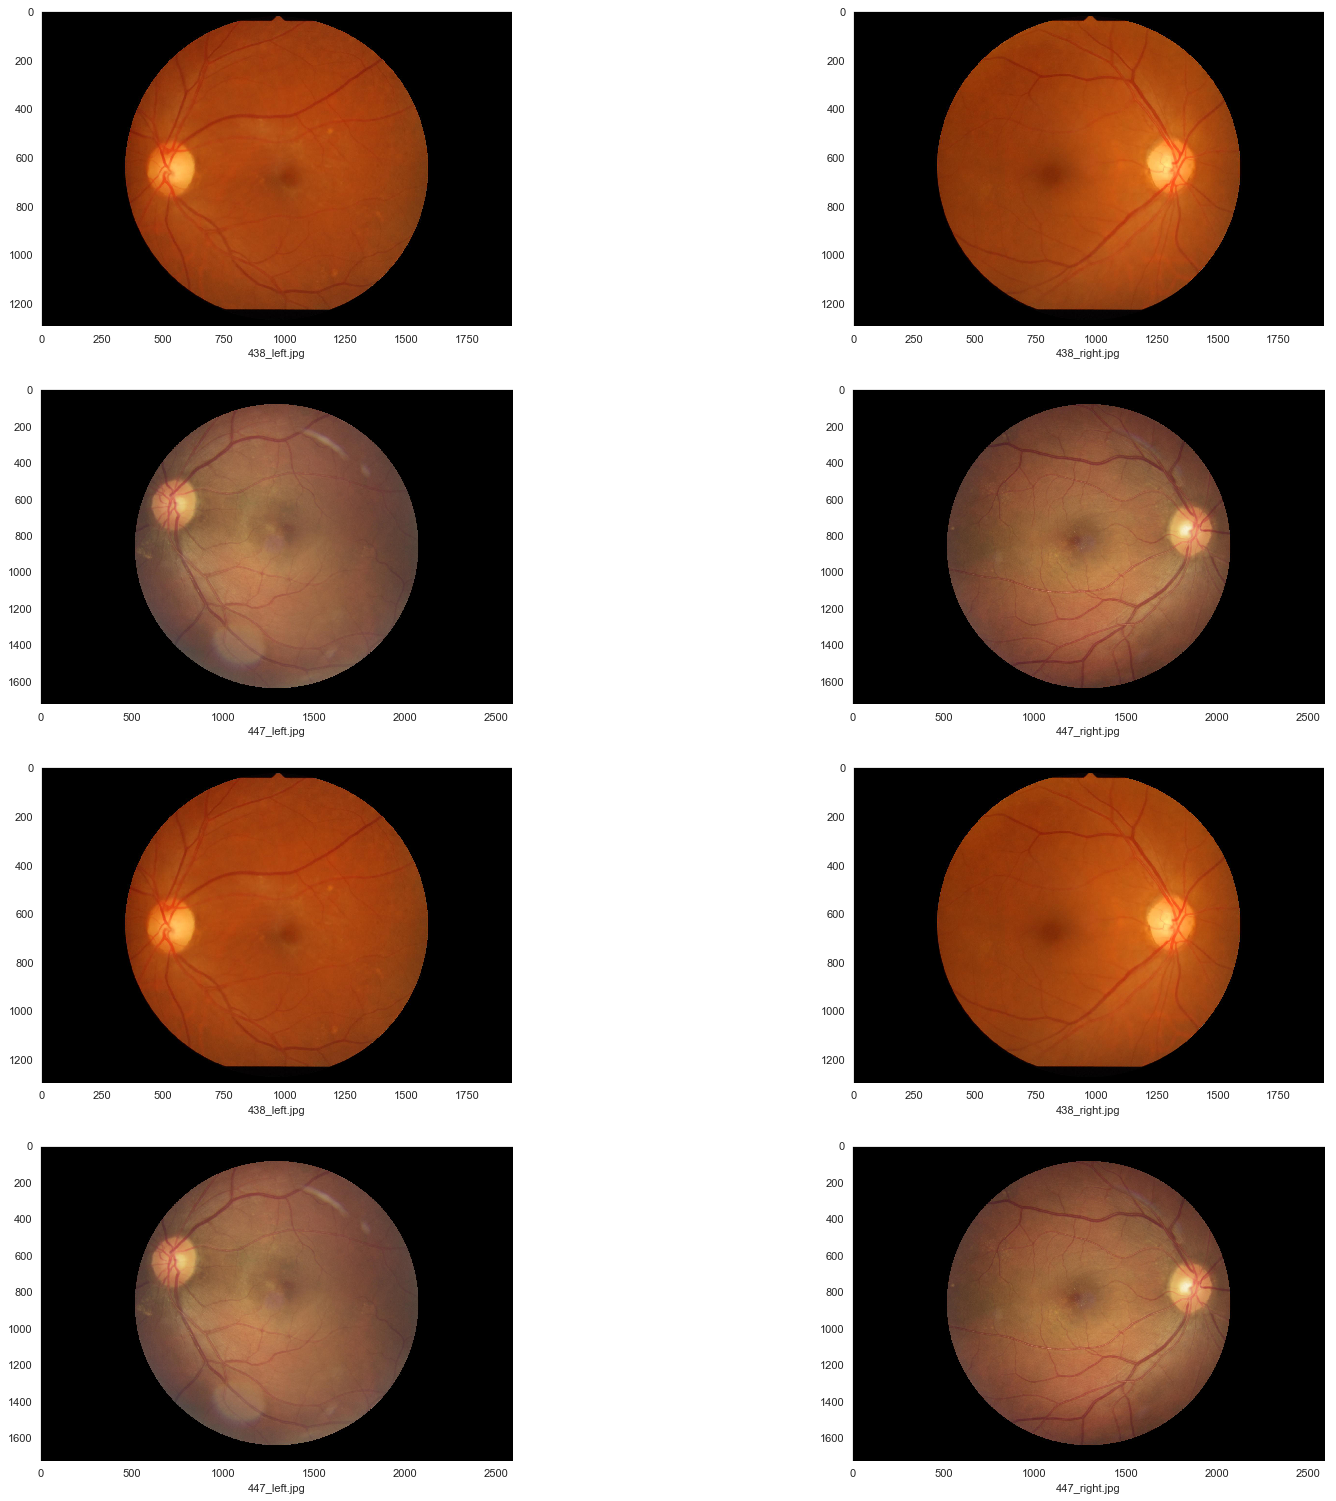

In [26]:
# plot some image and check them
# Set up plot
nrows = 4
ncols = 2
fig, ax = plt.subplots(figsize=(24, 24), dpi=80)

# Random image to plot
x = df.iloc[random.sample(range(1, len(df)), nrows)]


for i in range(0, nrows * ncols, 2):
    left_img_path = x.iloc[(i + 1) % 4]['Left-Fundus']
    right_img_path = x.iloc[(i + 1) % 4]['Right-Fundus']
    img_left = imread(os.path.join(data_dir, train_img_dir, left_img_path))
    img_right = imread(os.path.join(data_dir, train_img_dir, right_img_path))
    # plot left
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(img_left)
    plt.xlabel(left_img_path)
    
    # plot right
    plt.subplot(nrows, ncols, i + 2)
    plt.imshow(img_right)
    plt.xlabel(right_img_path)

In [27]:
print('Number of train images is ', len(df)*2)
print('Number of test images is ', len(os.listdir(os.path.join(data_dir, test_img_dir))))

Number of train images is  7000
Number of test images is  7000


In [28]:
def get_h_w_img(img):
    h, w, _ = img.shape
    return h, w

In [29]:
print("Get shape left images")
left_img_shapes = [imread(os.path.join(data_dir, train_img_dir, img)).shape for img in tqdm(df['Left-Fundus'].values)]

print("Get shape right images")
right_img_shapes = [imread(os.path.join(data_dir, train_img_dir, img)).shape for img in tqdm(df['Right-Fundus'].values)]


Get shape left images



Get shape right images


In [40]:
def get_average_image_size(list_img_size):
    h = 0
    w = 0
    for s in list_img_size:
        h += s[0]
        w += s[1]
    return h/len(list_img_size), w/len(list_img_size)

In [43]:
h_l, w_l = get_average_image_size(left_img_shapes)
h_r, w_r = get_average_image_size(right_img_shapes)

In [46]:
print('Average image left side, H is ', str(h_l), '   W is ', str(w_l))
print('Average image right side, H is ', str(h_r), '   W is ', str(w_r))

Average image left side, H is  1807.3228571428572    W is  2465.095714285714
Average image right side, H is  1808.4325714285715    W is  2466.147142857143
